In [509]:
import pandas as pd
import numpy as np

In [510]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [511]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [512]:
df = pd.read_csv('/content/drive/MyDrive/train.csv')

In [513]:
df

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1.0,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3.0,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3.0,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2.0,5.0,5.9,0.52


In [514]:
df1 = pd.read_csv('/content/drive/MyDrive/test.csv')

In [515]:
df1

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,fffe31003300390039003000,2008-12-10,Female,Service,No,2.0,5.0,7.7
1,fffe31003300310037003800,2008-08-14,Female,Product,Yes,1.0,2.0,5.2
2,fffe33003400380035003900,2008-11-13,Male,Product,Yes,1.0,3.0,5.9
3,fffe3100370039003200,2008-02-07,Female,Service,No,3.0,6.0,4.6
4,fffe32003600390036003700,2008-07-17,Female,Product,No,2.0,5.0,6.4
...,...,...,...,...,...,...,...,...
12245,fffe3900310034003700,2008-10-02,Female,Service,Yes,1.0,2.0,6.1
12246,fffe32003600330034003000,2008-03-31,Female,Product,Yes,2.0,4.0,5.9
12247,fffe31003800340039003000,2008-02-12,Male,Service,No,4.0,7.0,9.6
12248,fffe32003600380031003800,2008-02-06,Male,Service,No,3.0,6.0,6.7


In [516]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12250 entries, 0 to 12249
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           12250 non-null  object 
 1   Date of Joining       12250 non-null  object 
 2   Gender                12250 non-null  object 
 3   Company Type          12250 non-null  object 
 4   WFH Setup Available   12250 non-null  object 
 5   Designation           12250 non-null  float64
 6   Resource Allocation   12250 non-null  float64
 7   Mental Fatigue Score  12250 non-null  float64
dtypes: float64(3), object(5)
memory usage: 765.8+ KB


In [517]:
df.columns

Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Burn Rate'],
      dtype='object')

In [518]:
df.groupby('Gender').count()

,Employee ID,Date of Joining,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
Gender,,,,,,,,
Female,11908,11908,11908,11908,11908,11197,10780,11349
Male,10842,10842,10842,10842,10842,10172,9853,10277


In [519]:
df.groupby('Company Type').count()

,Employee ID,Date of Joining,Gender,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
Company Type,,,,,,,,
Product,7917,7917,7917,7917,7917,7409,7159,7502
Service,14833,14833,14833,14833,14833,13960,13474,14124


In [520]:
df.groupby('WFH Setup Available').count()

,Employee ID,Date of Joining,Gender,Company Type,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
WFH Setup Available,,,,,,,,
No,10460,10460,10460,10460,10460,9819,9502,9941
Yes,12290,12290,12290,12290,12290,11550,11131,11685


In [521]:
df.groupby('Designation').count()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Resource Allocation,Mental Fatigue Score,Burn Rate
Designation,,,,,,,,
0.0,1507,1507,1507,1507,1507,1421,1362,1439
1.0,4881,4881,4881,4881,4881,4586,4417,4632
2.0,7588,7588,7588,7588,7588,7108,6922,7206
3.0,5985,5985,5985,5985,5985,5630,5423,5698
4.0,2391,2391,2391,2391,2391,2251,2153,2275
5.0,398,398,398,398,398,373,356,376


In [522]:
df.groupby('Resource Allocation').count()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Mental Fatigue Score,Burn Rate
Resource Allocation,,,,,,,,
1.0,1791,1791,1791,1791,1791,1791,1625,1701
2.0,2075,2075,2075,2075,2075,2075,1872,1988
3.0,3192,3192,3192,3192,3192,3192,2903,3028
4.0,3893,3893,3893,3893,3893,3893,3560,3694
5.0,3861,3861,3861,3861,3861,3861,3530,3670
6.0,2943,2943,2943,2943,2943,2943,2692,2817
7.0,1965,1965,1965,1965,1965,1965,1769,1880
8.0,1044,1044,1044,1044,1044,1044,952,992
9.0,446,446,446,446,446,446,410,428


In [523]:
df.groupby('Mental Fatigue Score').count()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Burn Rate
Mental Fatigue Score,,,,,,,,
0.0,171,171,171,171,171,171,164,164
0.1,17,17,17,17,17,17,14,15
0.2,23,23,23,23,23,23,21,22
0.3,13,13,13,13,13,13,13,11
0.4,19,19,19,19,19,19,18,16
...,...,...,...,...,...,...,...,...
9.6,32,32,32,32,32,32,32,32
9.7,40,40,40,40,40,40,38,37
9.8,41,41,41,41,41,41,41,40


In [524]:
import matplotlib.pyplot as plt

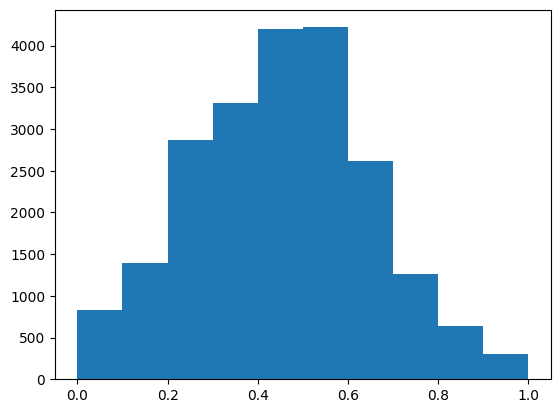

In [525]:
plt.hist(df['Burn Rate'])

plt.show()

In [526]:
df.isna().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [527]:
df.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


In [528]:
df2 = df.drop('Employee ID',axis=1)

In [529]:
df2

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...
22745,2008-12-30,Female,Service,No,1.0,3.0,NaN,0.41
22746,2008-01-19,Female,Product,Yes,3.0,6.0,6.7,0.59
22747,2008-11-05,Male,Service,Yes,3.0,7.0,NaN,0.72
22748,2008-01-10,Female,Service,No,2.0,5.0,5.9,0.52


In [530]:
df2 = df2.drop('Date of Joining',axis=1)

In [531]:
df2

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,Female,Service,No,2.0,3.0,3.8,0.16
1,Male,Service,Yes,1.0,2.0,5.0,0.36
2,Female,Product,Yes,2.0,NaN,5.8,0.49
3,Male,Service,Yes,1.0,1.0,2.6,0.20
4,Female,Service,No,3.0,7.0,6.9,0.52
...,...,...,...,...,...,...,...
22745,Female,Service,No,1.0,3.0,NaN,0.41
22746,Female,Product,Yes,3.0,6.0,6.7,0.59
22747,Male,Service,Yes,3.0,7.0,NaN,0.72
22748,Female,Service,No,2.0,5.0,5.9,0.52


In [532]:
df2.corr()

<ipython-input-532-e0c6714eb3b3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.corr()


,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
Designation,1.000000,0.878459,0.690983,0.737556
Resource Allocation,0.878459,1.000000,0.799662,0.856278
Mental Fatigue Score,0.690983,0.799662,1.000000,0.944546
Burn Rate,0.737556,0.856278,0.944546,1.000000


In [533]:
df2 = df2.replace({'male':0, 'female':1})

In [534]:
df2

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,Female,Service,No,2.0,3.0,3.8,0.16
1,Male,Service,Yes,1.0,2.0,5.0,0.36
2,Female,Product,Yes,2.0,NaN,5.8,0.49
3,Male,Service,Yes,1.0,1.0,2.6,0.20
4,Female,Service,No,3.0,7.0,6.9,0.52
...,...,...,...,...,...,...,...
22745,Female,Service,No,1.0,3.0,NaN,0.41
22746,Female,Product,Yes,3.0,6.0,6.7,0.59
22747,Male,Service,Yes,3.0,7.0,NaN,0.72
22748,Female,Service,No,2.0,5.0,5.9,0.52


In [535]:
import seaborn as sns

<Axes: xlabel='Gender', ylabel='Burn Rate'>

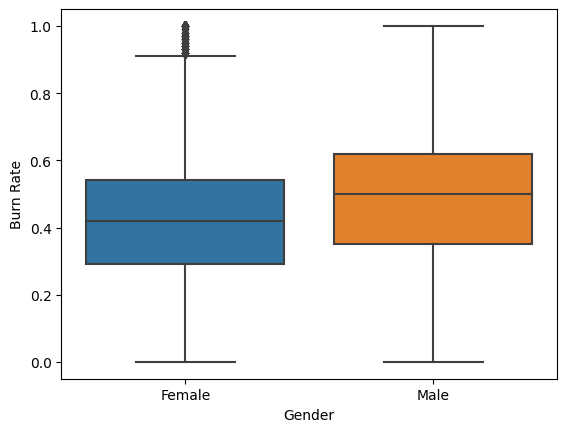

In [536]:
sns.boxplot(y= 'Burn Rate',x = 'Gender',data = df2)

<Axes: xlabel='Gender', ylabel='Resource Allocation'>

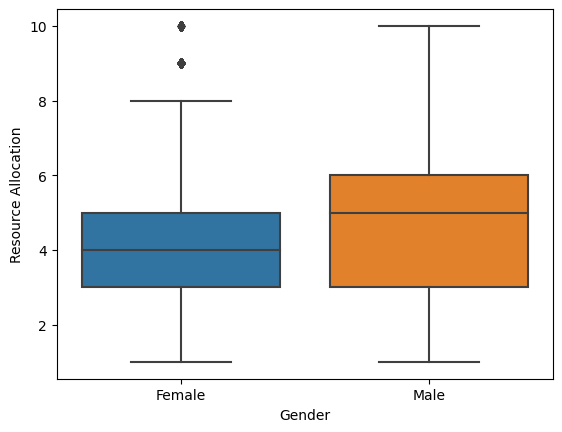

In [537]:
sns.boxplot(y= 'Resource Allocation',x = 'Gender',data = df2)

<Axes: xlabel='Gender', ylabel='Designation'>

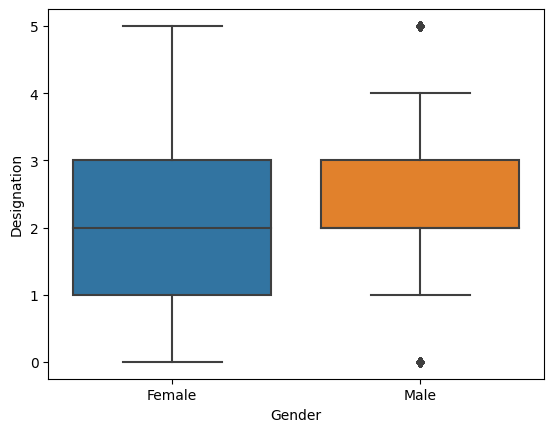

In [538]:
sns.boxplot(y= 'Designation',x = 'Gender',data = df2)

<Axes: xlabel='Gender', ylabel='Mental Fatigue Score'>

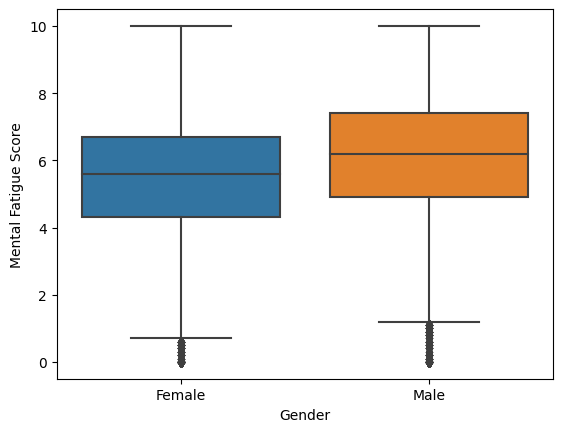

In [539]:
sns.boxplot(y= 'Mental Fatigue Score',x = 'Gender',data = df2)

<Axes: xlabel='Company Type', ylabel='Burn Rate'>

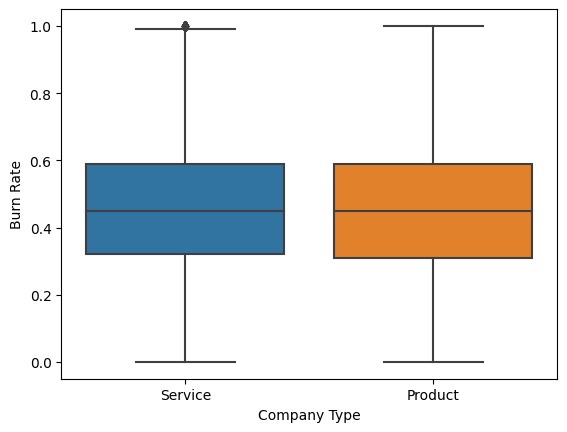

In [540]:
sns.boxplot(y= 'Burn Rate',x = 'Company Type',data = df2)

<Axes: xlabel='Gender', ylabel='Burn Rate'>

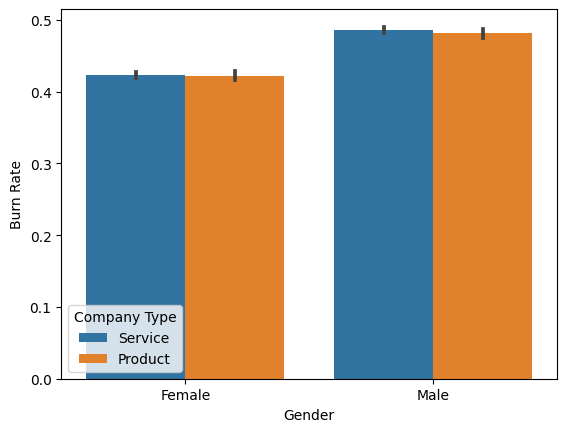

In [541]:
sns.barplot(x='Gender', y='Burn Rate', hue='Company Type',data=df2 )

<Axes: xlabel='Company Type', ylabel='Burn Rate'>

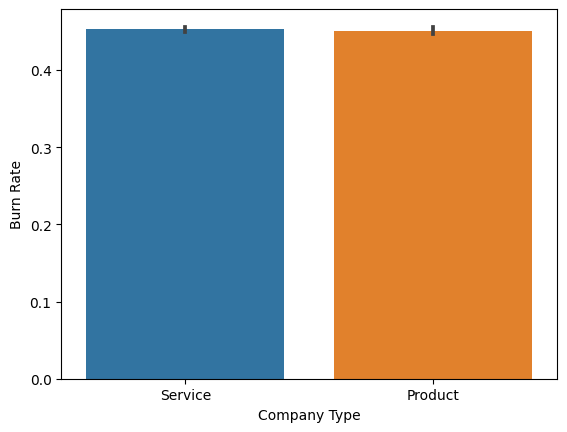

In [542]:
sns.barplot(x='Company Type', y='Burn Rate',data=df2 )

In [543]:
def preprocess_inputs(df):
  df = df.copy()

  df = df.drop('Employee ID',axis=1)

  missing_target_rows = df.loc[df['Burn Rate'].isna(), :].index
  df = df.drop(missing_target_rows, axis=0).reset_index(drop=True)

  for column in ['Resource Allocation', 'Mental Fatigue Score']:
    df[column] = df[column].fillna(df[column].mean())

  df['Date of Joining'] = pd.to_datetime(df['Date of Joining'])
  
  # df['Join Year'] = df['Date of Joining'].apply(lambda x: x.year) 2008년 하나밖에 없음
  df['Join Month'] = df['Date of Joining'].apply(lambda x: x.month)
  df['Join Day'] = df['Date of Joining'].apply(lambda x: x.day)
  df = df.drop('Date of Joining', axis=1)

  df['Gender'] = df['Gender'].replace({'Female': 0, 'Male': 1})
  df['Company Type'] = df['Company Type'].replace({'Product': 0, 'Service': 1})
  df['WFH Setup Available'] = df['WFH Setup Available'].replace({'No': 0, 'Yes': 1})

  y = df['Burn Rate']
  X = df.drop('Burn Rate', axis=1)

  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
  X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)


  return X_train, X_test, y_train, y_test

In [544]:
#df_test = preprocess_inputs(df)

In [545]:
#df_test

In [546]:
# X = preprocess_inputs(df)

In [547]:
# X.corr()

In [548]:
#sns.heatmap(data = X.corr(), annot=True, 
#fmt = '.2f', linewidths=.5, cmap='Blues')

In [549]:
X_train, X_test, y_train, y_test = preprocess_inputs(df)

In [550]:
df1

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,fffe31003300390039003000,2008-12-10,Female,Service,No,2.0,5.0,7.7
1,fffe31003300310037003800,2008-08-14,Female,Product,Yes,1.0,2.0,5.2
2,fffe33003400380035003900,2008-11-13,Male,Product,Yes,1.0,3.0,5.9
3,fffe3100370039003200,2008-02-07,Female,Service,No,3.0,6.0,4.6
4,fffe32003600390036003700,2008-07-17,Female,Product,No,2.0,5.0,6.4
...,...,...,...,...,...,...,...,...
12245,fffe3900310034003700,2008-10-02,Female,Service,Yes,1.0,2.0,6.1
12246,fffe32003600330034003000,2008-03-31,Female,Product,Yes,2.0,4.0,5.9
12247,fffe31003800340039003000,2008-02-12,Male,Service,No,4.0,7.0,9.6
12248,fffe32003600380031003800,2008-02-06,Male,Service,No,3.0,6.0,6.7


In [551]:
X_train

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Join Month,Join Day
8275,-0.954022,-1.379211,-1.087295,0.725025,0.768001,0.475128,0.433442,-0.649693
21284,1.048194,0.725052,-1.087295,1.604608,1.270205,1.131455,1.596251,-0.536187
16802,1.048194,0.725052,-1.087295,-0.154557,0.768001,0.420434,1.305549,0.371860
3271,1.048194,-1.379211,-1.087295,1.604608,2.274612,1.733089,0.142739,1.620424
5302,-0.954022,-1.379211,-1.087295,-0.154557,-0.236406,0.475128,0.724144,-0.422682
...,...,...,...,...,...,...,...,...
10955,-0.954022,0.725052,-1.087295,-0.154557,0.768001,0.803292,-1.020070,-1.444234
17289,-0.954022,0.725052,0.919713,0.725025,-0.236406,-0.509363,-0.147963,0.712377
5192,-0.954022,0.725052,0.919713,0.725025,0.265797,-1.165690,1.014847,0.031342
12172,1.048194,-1.379211,0.919713,-1.913723,-1.743017,-1.220384,0.433442,-1.671246


In [552]:
y_train

8275     0.61
21284    0.81
16802    0.62
3271     0.73
5302     0.43
         ... 
10955    0.58
17289    0.39
5192     0.24
12172    0.18
235      0.00
Name: Burn Rate, Length: 15138, dtype: float64

In [553]:
models = {
    "                     Linear Regression": LinearRegression(),
    " Linear Regression (L2 Regularization)": Ridge(),
    " Linear Regression (L1 Regularization)": Lasso(),
    "                   K-Nearest Neighbors": KNeighborsRegressor(),
    "                         Decision Tree": DecisionTreeRegressor(),
    "                         Random Forest": RandomForestRegressor(),
    "                     Gradient Boosting": GradientBoostingRegressor(),
                            
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

                     Linear Regression trained.
 Linear Regression (L2 Regularization) trained.
 Linear Regression (L1 Regularization) trained.
                   K-Nearest Neighbors trained.
                         Decision Tree trained.
                         Random Forest trained.
                     Gradient Boosting trained.


In [554]:
for name, model in models.items():
    print(name + " R^2 Score: {:.5f}".format(model.score(X_test, y_test)))

                     Linear Regression R^2 Score: 0.87075
 Linear Regression (L2 Regularization) R^2 Score: 0.87075
 Linear Regression (L1 Regularization) R^2 Score: -0.00001
                   K-Nearest Neighbors R^2 Score: 0.85603
                         Decision Tree R^2 Score: 0.81657
                         Random Forest R^2 Score: 0.89786
                     Gradient Boosting R^2 Score: 0.90257


In [555]:
gradient = GradientBoostingRegressor()

In [556]:
gradient.fit(X_train,y_train)

GradientBoostingRegressor()

In [557]:
X_train.shape

(15138, 8)

In [558]:
new_data = np.array([[1,1,1,2.0,3.0,5.728187854407987,8,5]])

In [559]:
new_data =new_data.reshape(1,8)

In [560]:
gradient.predict(new_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([0.96058855])

In [561]:
import joblib

In [562]:
joblib.dump(gradient, 'model2.pkl')

['model2.pkl']